# Student Performance

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor



### Loading data

In [2]:
df=pd.read_csv('data\Student_Performance.csv')

### data overview

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [6]:
df.duplicated().sum()

127

In [7]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


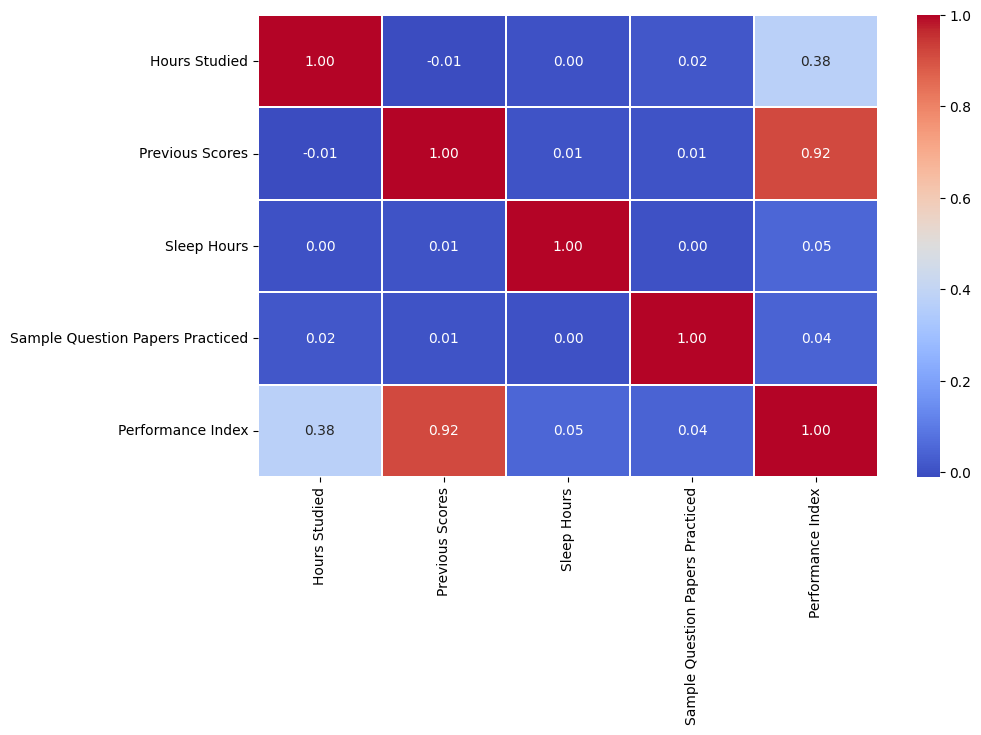

In [9]:
#correlation matrix between numerical columns
plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2,cmap='coolwarm')
plt.show()

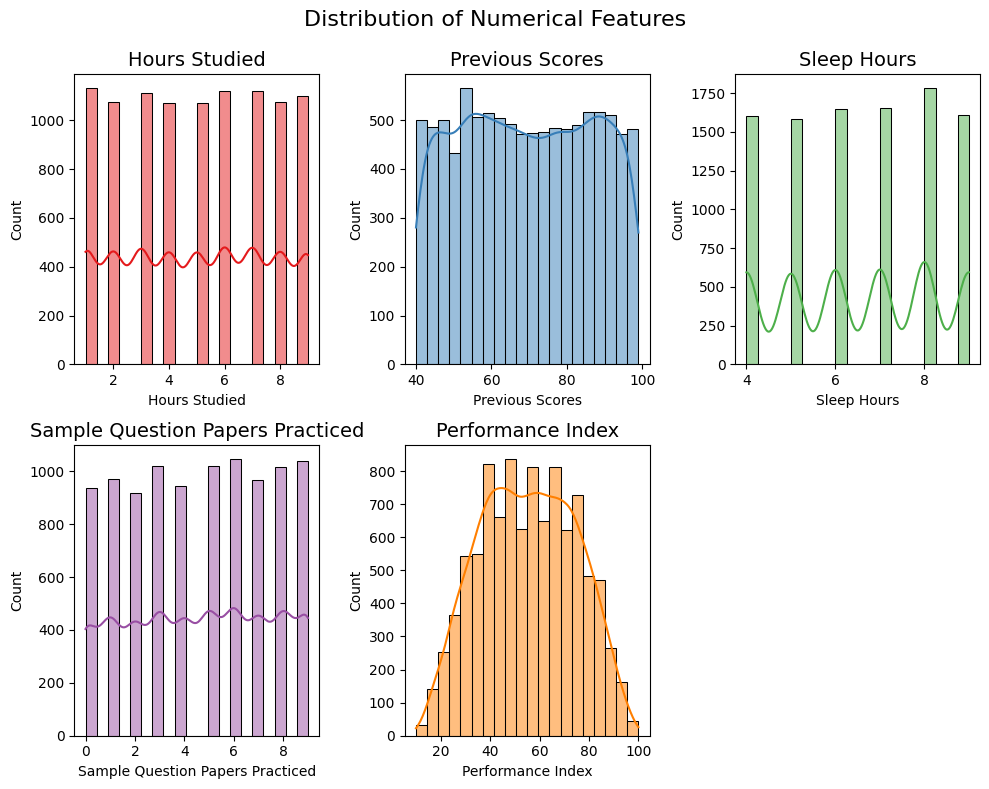

In [10]:
numerical_cols = df.select_dtypes(exclude = 'object').columns
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set1")[i-1], bins=20)
    plt.title(f'{col}', fontsize=14)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title spacing
plt.show()


### split data

In [11]:
#encode categorical columns
encoder = LabelEncoder()
df["Extracurricular Activities"] =  encoder.fit_transform(df["Extracurricular Activities"])

In [12]:
X=df.drop(["Performance Index"],axis=1)
y=df["Performance Index"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)  
#Transform the test data
X_test_scaled = scaler.transform(x_test)

### train models

In [14]:
# Initialize the model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Predict with Linear Regression
y_pred_linear = linear_reg.predict(X_test_scaled)

# Calculate metrics
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression R²: {r2_linear}")
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression MAE: {mae_linear}")
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Linear Regression RMSE: {rmse_linear}")

Linear Regression R²: 0.9884301209927054
Linear Regression MAE: 1.6469703984255548
Linear Regression RMSE: 2.0750664901488025


In [23]:
# Calculate training metrics
y_pred_train_linear = linear_reg.predict(X_train_scaled)

r2_train_linear = r2_score(y_train, y_pred_train_linear)
print(f"Training R²: {r2_train_linear}")

mae_train_linear = mean_absolute_error(y_train, y_pred_train_linear)
print(f"Training MAE: {mae_train_linear}")

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_pred_train_linear))
print(f"Training RMSE: {rmse_train_linear}")


Training R²: 0.9887391160677558
Training MAE: 1.6171939645366622
Training RMSE: 2.0358228155328564


#### random forest


In [16]:
def evaluate_rf_model(X_train, y_train, X_test, y_test, n_estimators_list): 
    results = []
    
    for n in n_estimators_list:
        # Initialize RandomForestRegressor with the current n_estimators
        rf = RandomForestRegressor(n_estimators=n, random_state=42)
        
        # Train the model
        rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = rf.predict(X_test)
        
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
        
        # Store the results
        results.append((n, r2, mae, rmse))
        
        print(f"n_estimators: {n}")
        print(f"  R²: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print()
    
    # Find the best model (highest R²)
    best_n = max(results, key=lambda x: x[1])
    print(f"Best n_estimators: {best_n[0]} with R²: {best_n[1]:.4f}")

# Define the n_estimators values to test
n_estimators_values = [10, 20, 50, 100]

# Call the function with your data
evaluate_rf_model(x_train, y_train, x_test, y_test, n_estimators_values) #no need for scaling


n_estimators: 10
  R²: 0.9839
  MAE: 1.9604
  RMSE: 2.0751

n_estimators: 20
  R²: 0.9845
  MAE: 1.9244
  RMSE: 2.0751

n_estimators: 50
  R²: 0.9849
  MAE: 1.8957
  RMSE: 2.0751

n_estimators: 100
  R²: 0.9849
  MAE: 1.8988
  RMSE: 2.0751

Best n_estimators: 100 with R²: 0.9849


In [17]:
# Initialize RandomForestRegressor with default settings (n_estimators=100)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

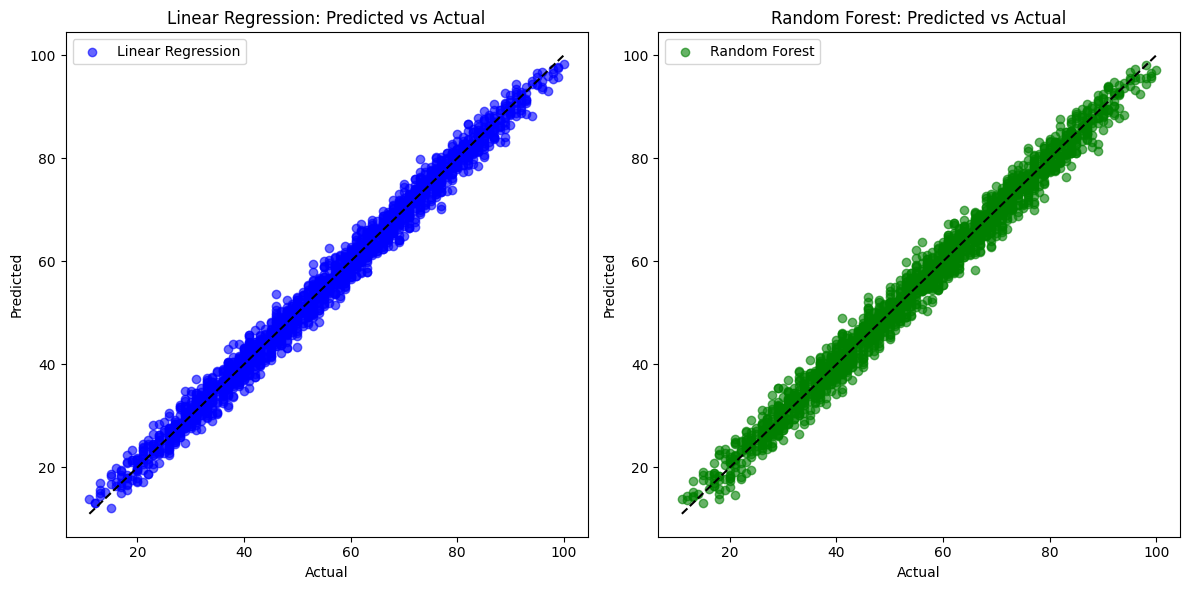

In [19]:
# Linear Regression Predictions
lr_predictions = linear_reg.predict(X_test_scaled)

# Random Forest Predictions
rf_predictions = rf.predict(x_test)

# Plot
plt.figure(figsize=(12, 6))

# Subplot 1: LR Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression',alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Subplot 2: RF Predicted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, color='green', label='Random Forest',alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
# Create a new DataFrame with actual and predicted values for regression
df_regression = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression Predicted': lr_predictions,
    'Random Forest Predicted': rf_predictions
})

# Display the regression results
print("\nRegression Task:")
display(df_regression.head(15))


Regression Task:


,Actual,Linear Regression Predicted,Random Forest Predicted
6099,47,46.480013,45.871667
106,76,80.285379,81.400667
9265,62,61.065188,60.862619
4707,23,22.706315,22.880000
2155,76,74.836868,74.973333
6594,83,84.194968,83.410000
9438,60,61.993141,61.750000
8905,51,50.337443,51.074167
2012,38,38.898681,39.527333
568,58,55.753202,57.040000


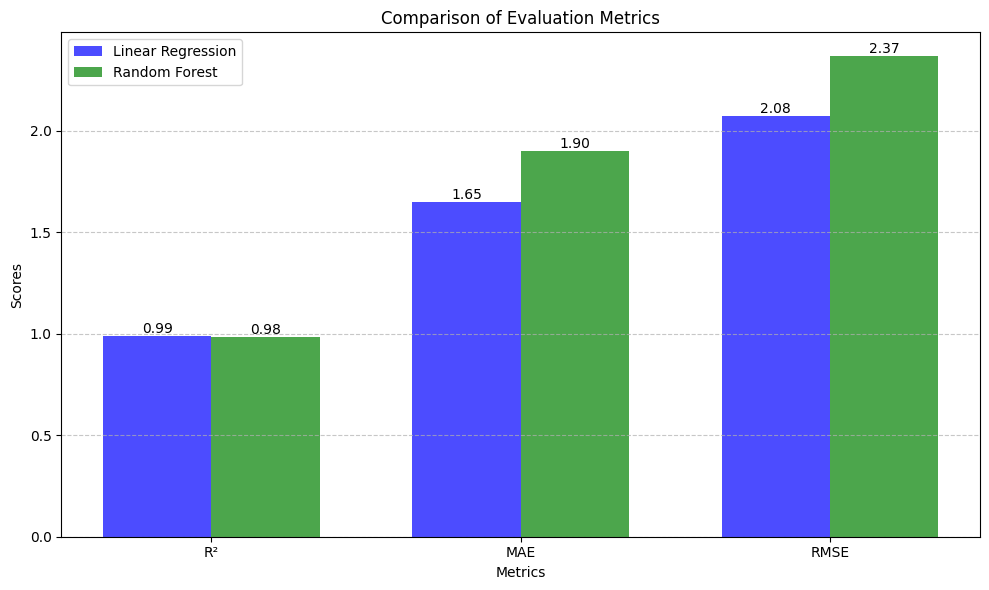

In [22]:
# Calculate Random Forest metrics
r2_rf = r2_score(y_test, rf_predictions)
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Prepare data for plotting
metrics = ['R²', 'MAE', 'RMSE']
lr_scores = [r2_linear, mae_linear, rmse_linear]
rf_scores = [r2_rf, mae_rf, rmse_rf]

# Bar positions
x = np.arange(len(metrics))

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Linear Regression bars
bars1 = plt.bar(x - bar_width / 2, lr_scores, bar_width, label='Linear Regression', color='blue', alpha=0.7)

# Random Forest bars
bars2 = plt.bar(x + bar_width / 2, rf_scores, bar_width, label='Random Forest', color='green', alpha=0.7)

# Annotate bars with scores
for bar, score in zip(bars1, lr_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

for bar, score in zip(bars2, rf_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

# Titles and labels
plt.title('Comparison of Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(x, metrics)
plt.legend()

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
#suggested model: both linear regression and random forest regression performed well with linear regression slightly better
